# The Battle of Neighborhoods

<h2> Introduction & Biosness Problem </h2>

<h3>Introduction</h3>

<p>New York City is very known for having a very diverse community. It is also known as one of the
most diverse cities in the entire world. Food plays a big role, if someone travels tot New York,
he/she could experience variety of food diversity too ranging from European food style to Asians.
The city consists of 5 Boroughs, namely: Queens, Brooklyn, Bronx, Manhattan, and Staten Island.
All of them provides the varying food culture and diverse.
As the city grows more and more popular because of its diversity, many people from around the
world wish to visit this diverse city. Including the most populated country in the world, China. As
of 2017, there are 893,697 total population of Chinese ethnicity in the City itself. Hence, it is
known that there are large Chinatown in Brooklyn, Queens, and Manhattan. This is an interesting
study to update the New Yorkers with new surveys of which area of the city provides varies
Chinese food as many Chinese tourist would visit the city to taste and compare their hometown
food variation.</p>

<h3>Business Problem</h3>

<p>According to the NY Times, the number of Chinese visitors to New York City continues to rise each
year. As in 2018, the visitors (Non-American Chinese Ethnic people) reached the number of 65.2
million people as the ninth straight annual increase. This incredible huge number of course will
interact more of these tourists to taste and compare the Chinese cuisines in NYC to their
hometown in China / Asian countries with huge Chinese population. Hence, a survey of which part
of NYC to provide more Chinese restaurants will be beneficial for these Chinese tourists to travel
and taste NYC Chinese style cuisine. This experiment will help to provide such information for the
Chinese tourist in need.</p>

<h3>Target Audience</h3>

<p>The main target of this experiment is Chinese people who comes to NYC to travel and try the NYC
Chinese cuisine</p>

In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import io
from io import BytesIO
#download dependencies

#!conda update -n base -c defaults conda
import json #library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



In [12]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [13]:
neighborhoods_data = newyork_data['features']

In [14]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [ ]:
neighborhoods

In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)


The dataframe has 5 boroughs and 306 neighborhoods.


In [9]:
def get_venues(lat,lng):
    
    #set variables
    CLIENT_ID = '05K5KD1U5KGPJUHFZYPUYT00INNSQZEWDLA2VCCFSKR0GP3Z' # your Foursquare ID
    CLIENT_SECRET = '4JJFOMUCBG5JWKSKORR45B0MFAOCBDVSPIGB4ZSLRGRLYQIK' # your Foursquare Secret
    VERSION = '20200424' # Foursquare API version
    LIMIT = 500
    radius = 500
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    results = requests.get(url).json() # get all the data
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_nyc_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json() # all data is in features label
    
    features=resp['features'] # define the dataframe columns
    
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']  # instantiate the dataframe
    
    nyc_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        nyc_data = nyc_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return nyc_data

In [10]:
nyc_data = get_nyc_data()
nyc_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


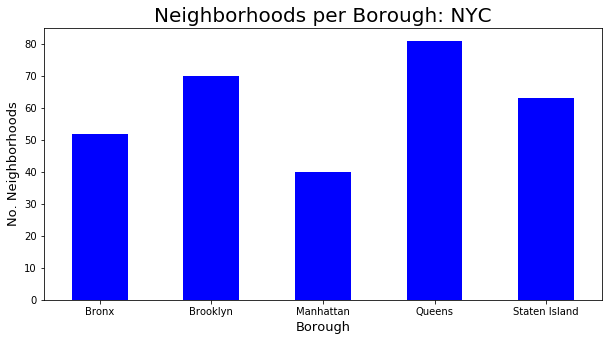

In [13]:
gry = 0.2, 0.4, 0.6, 0.6
nyc_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color='b')
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 13)
plt.ylabel('No. Neighborhoods',fontsize = 13)
plt.xticks(rotation = 'horizontal')
plt.show()

In [14]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
Chinese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    Chinese_resturants=venues[venues['Category']=='Chinese Restaurant']   
    print('(',count,'/',len(neighborhoods),')','Chinese Resturants in '+Neighborhood+', '+Borough+':'+str(len(Chinese_resturants)))
    for resturant_detail in Chinese_resturants.values.tolist():
        id, name , category=resturant_detail
        Chinese_rest_ny = Chinese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Chinese Resturants in Wakefield, Bronx:0
( 2 / 306 ) Chinese Resturants in Co-op City, Bronx:0
( 3 / 306 ) Chinese Resturants in Eastchester, Bronx:0
( 4 / 306 ) Chinese Resturants in Fieldston, Bronx:0
( 5 / 306 ) Chinese Resturants in Riverdale, Bronx:0
( 6 / 306 ) Chinese Resturants in Kingsbridge, Bronx:0
( 7 / 306 ) Chinese Resturants in Marble Hill, Manhattan:0
( 8 / 306 ) Chinese Resturants in Woodlawn, Bronx:0
( 9 / 306 ) Chinese Resturants in Norwood, Bronx:0
( 10 / 306 ) Chinese Resturants in Williamsbridge, Bronx:0
( 11 / 306 ) Chinese Resturants in Baychester, Bronx:0
( 12 / 306 ) Chinese Resturants in Pelham Parkway, Bronx:1
( 13 / 306 ) Chinese Resturants in City Island, Bronx:0
( 14 / 306 ) Chinese Resturants in Bedford Park, Bronx:0
( 15 / 306 ) Chinese Resturants in University Heights, Bronx:1
( 16 / 306 ) Chinese Resturants in Morris Heights, Bronx:0
( 17 / 306 ) Chinese Resturants in Fordham, Bronx:1
( 18 / 306 ) Chinese Resturants in East Tremont, Bronx:

In [18]:
Chinese_rest_ny.shape

(90, 4)

In [1]:
Chinese_rest_ny.to_csv('Chinese_rest_ny.csv', index=False)

NameError: name 'Chinese_rest_ny' is not defined

In [4]:
Chinese_rest_ny_csv = pd.read_csv('Chinese_rest_ny.csv')

In [5]:
Chinese_rest_ny_csv.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Pelham Parkway,4b9d6b45f964a52078ab36e3,Mr. Q's Chinese Restaurant
1,Bronx,University Heights,566f33e7498e44c2501bda81,Panda Express
2,Bronx,Fordham,566f33e7498e44c2501bda81,Panda Express
3,Bronx,West Farms,4c7e9ddafb13a1cdf5369ea4,El Pabelon De Oro
4,Bronx,Hunts Point,4c7e9ddafb13a1cdf5369ea4,El Pabelon De Oro


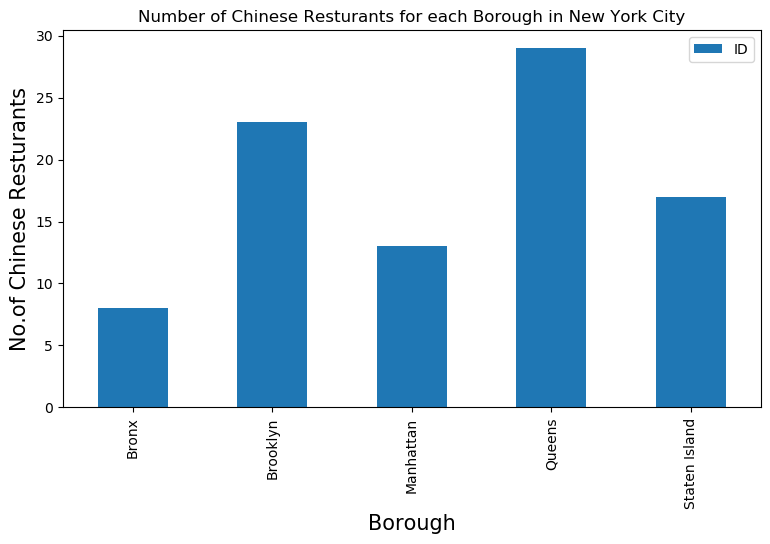

In [24]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Chinese Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Resturants', fontsize=15)
#giving a bar plot
Chinese_rest_ny_csv.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

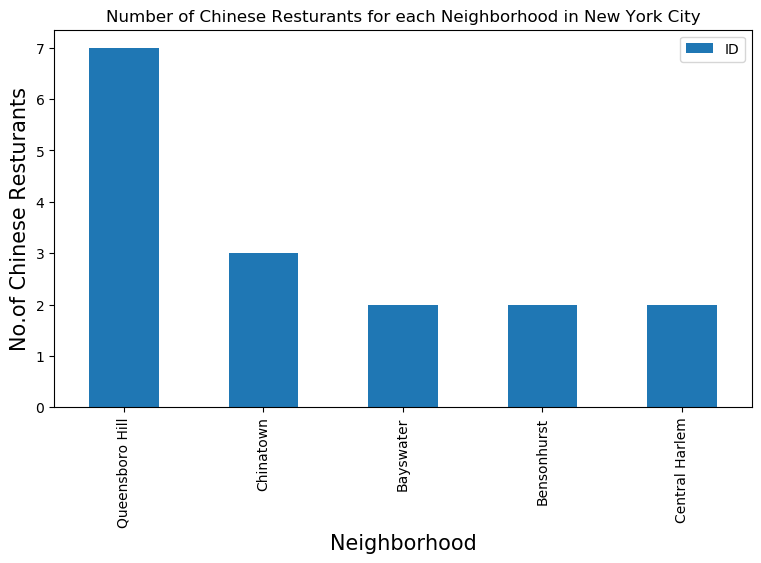

In [25]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Chinese Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Resturants', fontsize=15)
#giving a bar plot
Chinese_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [6]:
Chinese_rest_ny_csv[Chinese_rest_ny_csv['Neighborhood']=='Elmhurst']

,Borough,Neighborhood,ID,Name
36,Queens,Elmhurst,4eaf0752d3e30d448393b841,Lao Bei Fang
37,Queens,Elmhurst,56296f14498edb1ed77b64a3,Five Loaves and Two Fishes


In [7]:
def get_venue_details(venue_id):
    #set variables
    CLIENT_ID = '05K5KD1U5KGPJUHFZYPUYT00INNSQZEWDLA2VCCFSKR0GP3Z' # your Foursquare ID
    CLIENT_SECRET = '4JJFOMUCBG5JWKSKORR45B0MFAOCBDVSPIGB4ZSLRGRLYQIK' # your Foursquare Secret
    VERSION = '20200424' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [11]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating']
Chinese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in Chinese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        #print(venue_details)
        id,name,likes,rating=venue_details.values.tolist()[0]
    except IndexError:
        #print('No data available for id=',ID) #assign 0 value for the restaurants as they may have been
                                            #recently opened or details do not exist in the FourSquare Database
        id,name,likes,rating=[0]*4                                                                                   
    #print('(',count,'/',len(chi_res_nyc),')','processed')
    Chinese_rest_stats_ny = Chinese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                },ignore_index=True)
                                                                                             
                                        
                                               
    count+=1

NameError: name 'Chinese_rest_ny' is not defined

In [ ]:
project.save_data("chinese restaurants stats nyc.csv", Chinese_rest_stats_ny.to_csv(), overwrite=chi_rest_stats_nyc = r'chinese restaurants stats nyc.csv'

Chinese_rest_stats_ny = r'chinese restaurants stats nyc.csv'               
Chinese_rest_stats_ny = pd.read_csv(Chinese_rest_stats_ny)
Chinese_rest_stats_ny.drop(['Unnamed: 0'], axis=1, inplace = True)
Chinese_rest_stats_ny.head()True)

In [ ]:
indexratingzero=Chinese_rest_stats_ny[Chinese_rest_stats_ny['Rating']==0].index
Chinese_rest_stats_ny.drop(indexratingzero, inplace=True)

In [ ]:
Chinese_rest_stats_ny.loc[Chinese_rest_stats_ny['Rating'].idxmax()]
neighborhood_stats = Chinese_rest_stats_ny.groupby('Neighborhood', as_index=False).mean()[['Neighborhood','Rating']]
neighborhood_stats.columns=['Neighborhood','Average Rating']
neighborhood_stats.sort_values(['Average Rating'], ascending=False).head()

In [ ]:
borough_stats=Chinese_rest_stats_ny.groupby('Borough', as_index=False).mean()[['Borough','Rating']]
borough_stats.columns=['Borough', 'Average Rating']
borough_stats.sort_values(['Average Rating'], ascending=False).head()

In [ ]:
borough_stats.groupby('Borough').mean()['Average Rating'].plot.bar(figsize=(10,5), color=gry)
plt.title('Average rating of Chinese Restaurants for each Borough', fontsize=20)
plt.xlabel('Borough',fontsize=13)
plt.ylabel('Average Rating', fontsize=13)
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
neighborhood_stats_rating = neighborhood_stats[neighborhood_stats['Average Rating']>=6.0]

In [ ]:
neighborhood_stats_rating = pd.merge(neighborhood_stats_rating, nyc_data, on='Neighborhood')
neighborhood_stats_rating=neighborhood_stats_rating[['Borough', 'Neighborhood','Latitude','Longitude','Average Rating']]

In [ ]:
latitude= 40.687936
longitude= -73.976358

#create map with neighborhoods and rating
from folium import plugins

#start with clean copy of NYC map
nyc_map = folium.Map(location=[latitude, longitude], zoom_start=11)

#instantiate a marker cluster object for the ratings in the dataframe
chi_rating = plugins.MarkerCluster().add_to(nyc_map)

neighborhood_stats_rating['Label']= neighborhood_stats_rating['Neighborhood']+'('+neighborhood_stats_rating['Average Rating'].map(str)+')'
#loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in neighborhood_stats_rating[['Latitude','Longitude','Label']].values:
    folium.Marker(
        location=[lat,lng],
        icon=None,
        popup=label).add_to(chi_rating)
    
nyc_map

In [ ]:
#create choropleth map for average rating per borough
nyc_geo = r'Borough Boundaries.geojson'
nyc_map = folium.Map(location=[latitude,longitude], zoom_start=11)

nyc_map.choropleth(
    geo_data=nyc_geo,
    name='choropleth',
    data=borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)
